These are commonly used metrics to evaluate the performance of a regression model.    
These metrics give you different ways of looking at how "good" or "bad" your regression model is at making predictions.  
Findout the efficiency of the regression.         

There are various matrices :     
MSE        
MAE            
RMSE            
R2 score              
Adjusted R2 score           

In [232]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [233]:
df = pd.read_csv('./DataSets/48_placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package (in lpa)')

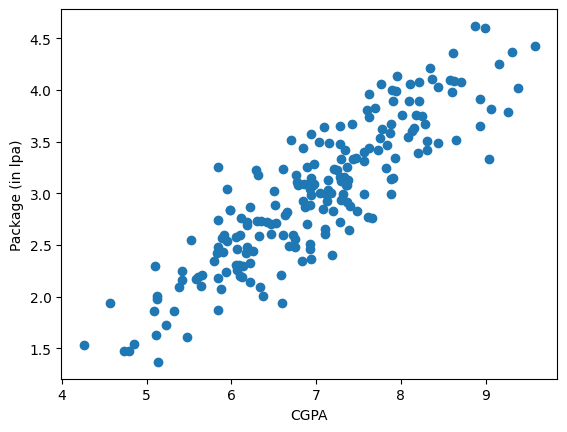

In [234]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [235]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [236]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
lr = LinearRegression()

In [239]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package (in lpa)')

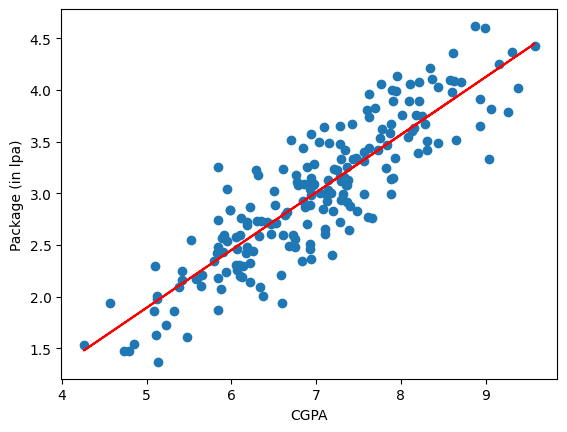

In [240]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

Metrices is simple,   
we are not going to do the code scratch because, function is avalable in sklearn for matrices.    

In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr.predict(x_test)

In [242]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [243]:
print("MAE in lpa : ", mean_absolute_error(y_test, y_pred))

MAE in lpa :  0.2884710931878175


In [244]:
print("MSE : ", mean_squared_error(y_test, y_pred))

MSE :  0.12129235313495527


In [245]:
print("RMSE in lpa : ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE in lpa :  0.34827051717731616


In [246]:
print("R2_score : ", r2_score(y_test, y_pred))

R2_score :  0.780730147510384


In [247]:
x_test.shape

(40, 1)

In [248]:
# Adjusted R2 score : Formula
r2 = r2_score(y_test, y_pred)
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

# add inappropreate column
add new random column no meaning of this column, let look r2 score is increase but adjecent r2 score is decrease or not. 

In [249]:
df.shape

(200, 2)

In [250]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.857620,3.26
1,5.12,0.551413,1.98
2,7.82,0.950102,3.25
3,7.42,0.264350,3.67
4,6.94,0.327094,3.57


Text(0, 0.5, 'package')

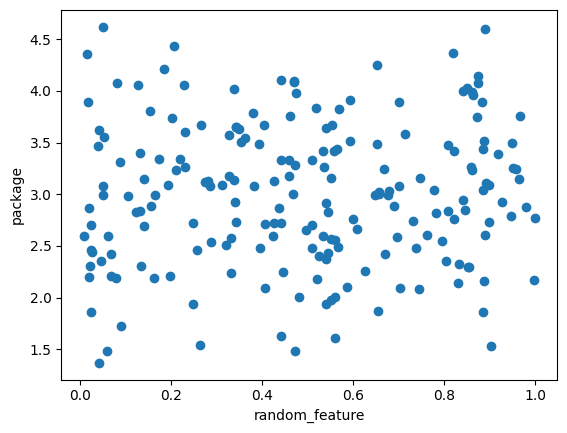

In [251]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

In [252]:
x = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [253]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [254]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [255]:
y_pred = lr.predict(x_test)
print('r2_score is : ', r2_score(y_test, y_pred))

r2_score is :  0.7799316493001122


In [256]:
# Adjusted R2 score : Formula
r2 = r2_score(y_test, y_pred)
1 - ((1-r2)*(40-1)/(40-1-1))

0.774140376913273

# add appropreate column
look what happens 

In [257]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]
new_df2.head(2)

,cgpa,iq,package
0,6.89,4.16,3.26
1,5.12,1.88,1.98


Text(0, 0.5, 'package (in LPA)')

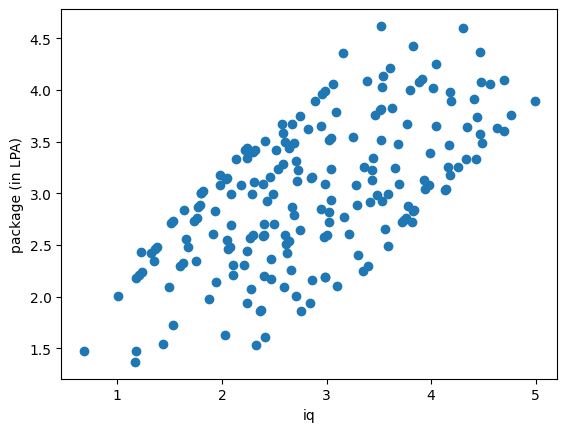

In [258]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package (in LPA)')

In [259]:
x = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [260]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [261]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [262]:
y_pred = lr.predict(x_test)
print('r2_score is : ', r2_score(y_test, y_pred))

r2_score is :  0.8200497576547399


In [263]:
# Adjusted R2 score : Formula
r2 = r2_score(y_test, y_pred)
1 - ((1-r2)*(40-1)/(40-1-1))

0.8153142249614436